# H-calls4famCluster

## Data Table

In [ ]:
# @title
import datetime
print(datetime.datetime.now())

2024-03-27 15:16:37.722975


Similar to the example we demonstrate in the class, here are some samples of malware call sequences.

Although you can know the dataset contains four malware families (as shown by the sub-directory), in this homework, you should pretend you have no idea what malware family a sample belongs to.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/calls4fam_0522_tfds.tgz'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('calls4fam_0522_tfds.tgz', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')

In [ ]:
!tar -zxvf calls4fam_0522_tfds.tgz

./calls4fam_0522/
./calls4fam_0522/2/
./calls4fam_0522/2/626.txt
./calls4fam_0522/2/834.txt
./calls4fam_0522/2/751.txt
./calls4fam_0522/2/866.txt
./calls4fam_0522/2/735.txt
./calls4fam_0522/2/850.txt
./calls4fam_0522/2/808.txt
./calls4fam_0522/2/847.txt
./calls4fam_0522/2/661.txt
./calls4fam_0522/2/809.txt
./calls4fam_0522/2/686.txt
./calls4fam_0522/2/638.txt
./calls4fam_0522/2/774.txt
./calls4fam_0522/2/758.txt
./calls4fam_0522/2/791.txt
./calls4fam_0522/2/631.txt
./calls4fam_0522/2/854.txt
./calls4fam_0522/2/629.txt
./calls4fam_0522/2/616.txt
./calls4fam_0522/2/889.txt
./calls4fam_0522/2/617.txt
./calls4fam_0522/2/902.txt
./calls4fam_0522/2/772.txt
./calls4fam_0522/2/837.txt
./calls4fam_0522/2/623.txt
./calls4fam_0522/2/815.txt
./calls4fam_0522/2/822.txt
./calls4fam_0522/2/648.txt
./calls4fam_0522/2/768.txt
./calls4fam_0522/2/884.txt
./calls4fam_0522/2/694.txt
./calls4fam_0522/2/745.txt
./calls4fam_0522/2/769.txt
./calls4fam_0522/2/839.txt
./calls4fam_0522/2/784.txt
./calls4fam_0522/

In [ ]:
!ls -al calls4fam_0522

total 56
drwxr-xr-x 6 root root  4096 Feb 21 04:06 .
drwxr-xr-x 1 root root  4096 Mar 27 15:16 ..
drwxr-xr-x 2 root root 12288 Feb 21 04:06 0
drwxr-xr-x 2 root root 12288 Feb 21 04:06 1
drwxr-xr-x 2 root root 12288 Feb 21 04:06 2
drwxr-xr-x 2 root root 12288 Feb 21 04:06 5


In [ ]:
def count_api_calls(malware_text_file):
  aip_dict = dict()
  with open(malware_text_file, 'r') as file:
    call_seq = file.readline() # note: only one line in .txt file
    calls = call_seq.split()
    for call in calls:
      if call in aip_dict:
        aip_dict[call] += 1
      else:
        aip_dict[call] = 1
    return aip_dict

In [ ]:
import os
# A dictionary to collect all count_api_calls() return
malware_call_dict = dict()

# Define the root directory to walk through
root_dir = "/content/calls4fam_0522/"

# Walk through the directory and its subdirectories
for dir_name, subdir_list, file_list in os.walk(root_dir):

    # Read all .txt files in the current directory
    for file_name in file_list:
        if file_name.endswith(".txt"):
            # Read the file contents
            subdir = dir_name.split('/')[-1]
            malware_call_dict[subdir+'/'+file_name] = count_api_calls(os.path.join(dir_name, file_name))

In [ ]:
import pandas as pd

# Convert the dictionary to a DataFrame
malware_call_df = pd.DataFrame.from_dict(malware_call_dict, orient='index')
malware_call_df.fillna(0, inplace=True)
malware_call_df

,close,dup2,execve,access,brk,fcntl,openat,fstat,mmap,read,...,_sysctl,symlinkat,mkdir,getdents64,unlink,ftruncate,rmdir,sched_setscheduler,kill,accept
5/1132.txt,18.0,1.0,1.0,9.0,3.0,3.0,13.0,15.0,19.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/970.txt,2.0,0.0,1.0,3.0,3.0,0.0,2.0,2.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1046.txt,2.0,0.0,1.0,3.0,3.0,0.0,2.0,2.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1117.txt,15.0,0.0,1.0,9.0,3.0,3.0,13.0,13.0,19.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/914.txt,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/505.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/398.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/397.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
malware_binary_call_df = malware_call_df.applymap(lambda x: 1.0 if x > 0.0 else 0.0)
malware_binary_call_df

,close,dup2,execve,access,brk,fcntl,openat,fstat,mmap,read,...,_sysctl,symlinkat,mkdir,getdents64,unlink,ftruncate,rmdir,sched_setscheduler,kill,accept
5/1132.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/970.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1046.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1117.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/914.txt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/505.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/398.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/397.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q1

Now, your turn. Try K-means in Q1. You may use either `malware_call_df` or `malware_binary_call_df`.


### Q1-1

Writre code to apply K-means, use `euclidean` to evaluate distance. Show the Elbow Plot with avgWithinSS.

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = malware_binary_call_df.values

In [ ]:
K = range(1,19)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [c for (c,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # avg within-cluster squared error

# alternative: scipy.spatial.distance.cdist
# Compute distance between each pair of the two collections of inputs.
D_k = [cdist(X, c, 'euclidean') for c in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
#avgWithinSS = [sum(d)/X.shape[0] for d in dist]

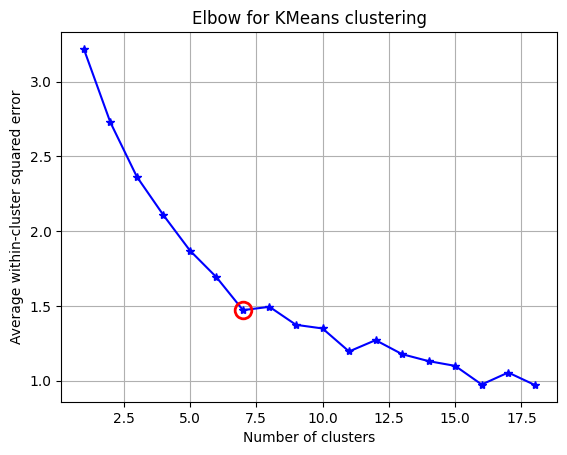

In [ ]:
k = 7
kIdx = k-1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.title('Elbow for KMeans clustering')
plt.show()

### Q1-2

How many clusters do you suggest by referencing the elbow plot? Why?

<font color='red'>從上圖可知7會是elbow plot。在7時，SSE相對較為平緩，因此將此elbow plot選為群數。</font>

### Q1-3

Show how many samples are there in each cluster? Is there any cluster which has only a few samples?

In [ ]:
cen, _ = kmeans(X, k)
cen.shape

(7, 121)

In [ ]:
D = cdist(X, cen, 'euclidean')
cIdx = np.argmin(D, axis=1)
dist = np.min(D, axis=1)

In [ ]:
# Count the occurrences of each cluster label
cluster_counts = np.bincount(cIdx)

# Create a pandas Series to display the counts
cluster_counts_series = pd.Series(cluster_counts, index=range(len(cluster_counts)))

# Sort the indices based on the values in descending order
sorted_indices = cluster_counts_series.argsort()[::-1]

# Use the sorted indices to sort the Series
cluster_counts_series_sorted = cluster_counts_series.iloc[sorted_indices]
# Display the counts
cluster_counts_series_sorted

3    307
6    286
0    223
2    109
4     99
5     96
1     88
dtype: int64

### Q1-4

`malware_call_df` is better or `malware_binary_call_df` is better to represent the data? (open question)


<font color='red'>我認為會因為所要分析的情境而有所不同，假如我們希望的是以某個事件是否有發生來做分類，那malware_binary_call_df會是比較適合的選擇。而我們如果是希望以某個事件所發生的頻率或是次數來當作分類的標準，那malware_call_df會是比較好的選擇。</font>

### Q1-5

what if we use some normalization or standardzation on `malware_call_df`? Would it be better to represent the data? (open question)

<font color='red'>我認為將malware_call_df的數值做標準化能夠更好的分析資料，因為某些資料的數值可能很小或很大，不利於資料的分析，而標準化能夠資料的尺度限定在同一範圍，讓不同特徵更容易進行比較。</font>

## Q2

Use UPGMA to visualized the data. You may sample the dataset for better visualization (lets say 10% sample in each class).

### Q2-1

Plot UPGMA using 10% data

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

from scipy.spatial.distance import squareform, pdist

In [ ]:
malware_binary_call_10_df = malware_binary_call_df.sample(frac=0.1)
malware_binary_call_10_df

,close,dup2,execve,access,brk,fcntl,openat,fstat,mmap,read,...,_sysctl,symlinkat,mkdir,getdents64,unlink,ftruncate,rmdir,sched_setscheduler,kill,accept
2/687.txt,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/140.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/58.txt,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1047.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/310.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/596.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/920.txt,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/48.txt,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/90.txt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


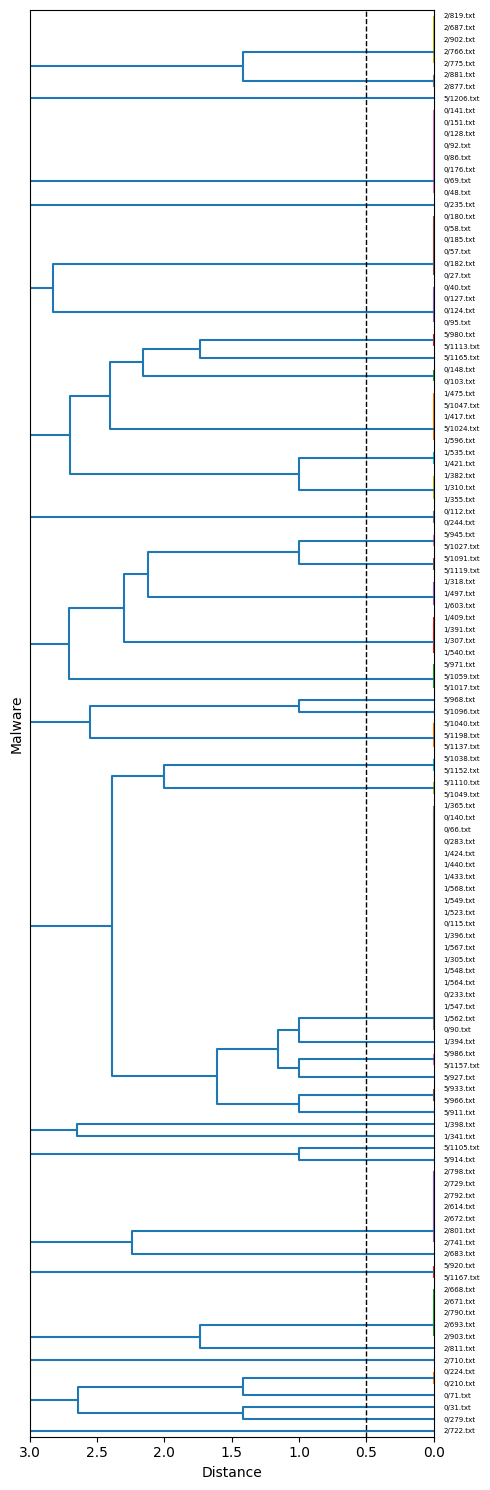

In [ ]:
# use binary features and euclidean distance
bd = pdist(malware_binary_call_10_df, metric='euclidean') # try jacc
upgma_threshold = 0.5
plt.figure(figsize=(5, 15))

Z = sch.linkage(bd, method='average')
P = sch.dendrogram(Z, labels=malware_binary_call_10_df.index,
                   color_threshold=upgma_threshold, orientation = 'left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.xlim([3, 0])
plt.tight_layout()
plt.show()

### Q2-2
Try to use jaccard distance in UPGMA.

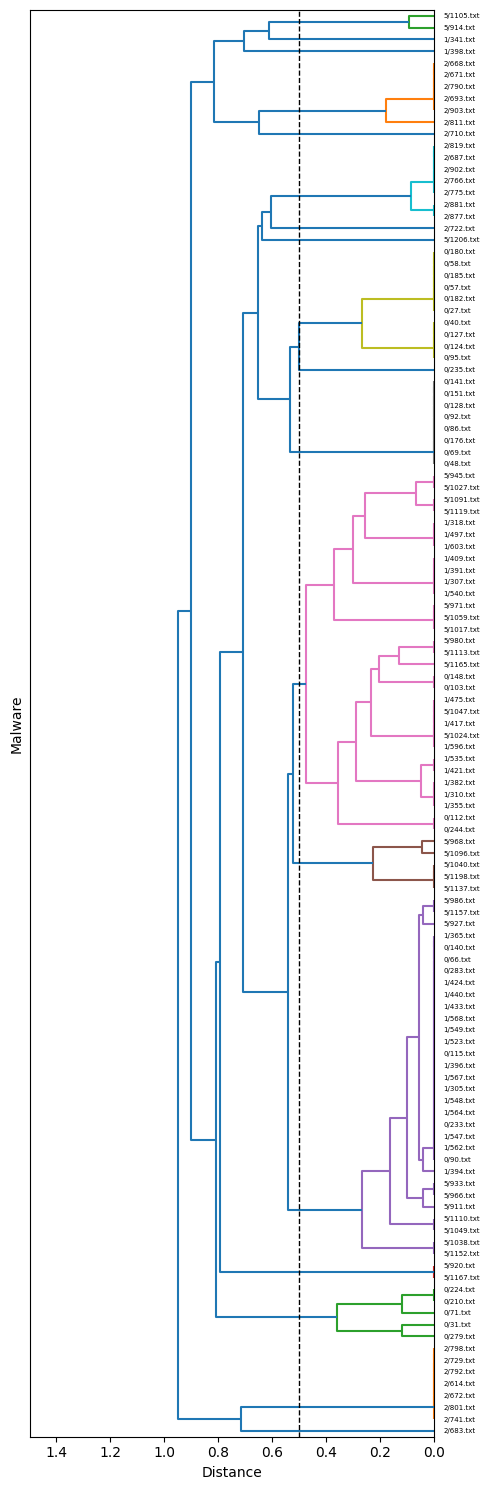

In [ ]:
# use binary features and jaccard distance
# Calculate pairwise Jaccard distances
bd_jaccard = pdist(malware_binary_call_10_df, metric='jaccard')

upgma_threshold = 0.5
plt.figure(figsize=(5, 15))

# Perform UPGMA clustering using Jaccard distances
Z = sch.linkage(bd_jaccard, method='average')

# Plot the dendrogram
P = sch.dendrogram(Z, labels=malware_binary_call_10_df.index,
                   color_threshold=upgma_threshold, orientation='left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.xlim([1.5, 0])  # Adjusted xlim for Jaccard distances
plt.tight_layout()
plt.show()

### Q2-2

Jaccard looks better. Why? (open question)

<font color='red'>Jaccard Distance在binary data較為適用，因為數據的表示方式為特徵的存在與否，而因為我們所分析的資料為malware_binary_call_10_df，是二元的資料，所以Jaccard distance分析的表現可能比較好。</font>

## Q3

### Q3-1

Try K-Means with k = 4, and compare the dbscan result with the actual class lable shown in the file name.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd

# Fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(malware_binary_call_df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Extract the actual class labels from the file names
actual_labels = [int(file_name.split('/')[0]) for file_name in malware_binary_call_df.index]

# Create a DataFrame to compare the actual labels with the cluster labels
compare_df = pd.DataFrame({'labels_true': actual_labels, 'cluster_label': cluster_labels})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
compare_df

,labels_true,cluster_label
0,5,0
1,5,1
2,5,1
3,5,0
4,5,2
...,...,...
1203,1,2
1204,1,2
1205,1,2
1206,1,2


### Q3-2

The cluster k=4 looks not good. How can you improve it?

<font color="red">我們也許可以嘗試不同k，由上面所使用的elbow plot找到最適合的k值。另外我們也可以使用feature engineering，分析各個feature，並決定某些特徵需不需要修改或移除。</font>

### Q4

Now, you can output the `malware_call_df` as a csv file, and analyze it in Orange.

In [ ]:
output_df = malware_call_df.copy()
output_df['target'] = malware_call_df.index.str.split('/').str[0]
output_df.to_csv('malware_call_df.csv')

### Q4-1

What is the best classificaiton rate you can find? What algorithm is it? You do not need to post the Orange workflow in this ipynb. Post the result is good enough.

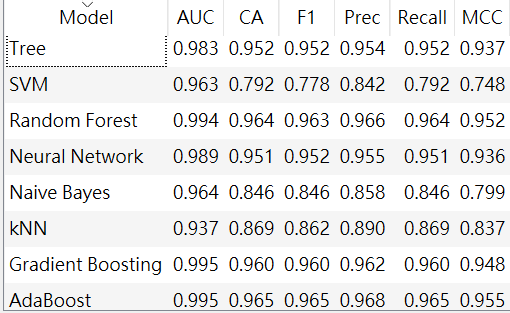

### Q4-2

Guess why the alogithim performs best? (open question)

<font color='red'>由上述的結果圖可以知道，adaboost在表現上較為優秀，可能的原因是adaboost能夠有效處理高維數據，並且能夠有效處理大量的特徵而不會over fitting。</font>